<a href="https://colab.research.google.com/github/Data-Scientist400701/Rossman_Sales_Prediction_Regression/blob/main/Rossmann_Sales_Prediction_Regression_Capstone_Sahil_Kolambkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <b><u> **Project Name**    - Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Saaquib Mustafa
##### **Team Member 2 -** Raja Chowdhury
##### **Team Member 3 -** Sandipan Das
##### **Team Member 4 -** Rahul Mukherjee 

# **Project Summary -**


This dataset has around 1017209 observations in it with 18 columns and it is a mix between categorical and numeric values. 
Analysing the data to discover key understandings (not limited to these) such as:
* 	On which day of the week sales is highest?
* 	On which week of the year sales is the highest?
* 	Are sales affected by any holiday or not?
* 	Which store type has the maximum number of sales?
* 	Information regarding stores who are continuing with their promo and who are not.

<b><u>Our Approach: </b></u>

Our first step was to understand the dataset of the Rossmann store  and then we started exploring and analysing each column. And we found out that we need to clean our dataset before performing the exploratory data analysis in order to get more accurate outcomes. Hence took the following steps:
* 	We treated null values of different columns accordingly. 
* 	We removed rows where the price was equal to zero. 
* 	We handled the outliers from columns using capping method 
* 	We figured out which are the important columns.
* 	We did dummification to convert categorical variables to numeric ones.  
* 	In Machine Learning we used algorithms such as Linear Regression, Lasso, Ridge, Decision Tree, Gradient Boosting and XG boost and fetched respective scores from all of these.



<b><u>Key Findings from EDA: </b></u>
* 	From the first graph it is clear that 'a' Store Model has the maximum number of sales and store counts followed by 'd' while Store Model 'b' has the least number of sales and store counts.
* 	From the second graph it is surprising to see that store model "b" which has the least number of store counts performs quite well on average sales and customers compared to other store models.
* 	We can see from the graph that Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts
* 	We can infer from the graph that assortment level 'b' with least store counts have performed quite well compared to 'a'. While there is another surprising fact that assortment level 'c' has the maximum number of sales with the least number of customers.
* 	Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticeable that whenever promo was open, the store has higher sales and customers compared to the period when promo was closed, which means promo had a good impact on the sales.
* 	We can infer from the graph that the sales are highest on the 30th followed by the 2nd and 4th dates of every month while sales are lowest on the 1st date of every month followed by the 25th and 26th dates.
* 	Here we can infer from the graph that the sales are at maximum on Mondays while sales are zero on Sunday because it seems like stores used to remain closed on Sundays.
* 	Here we can see that the Sales and Customers are at peak during November and December due to festive seasons like Christmas while sales are at lowest during January and May or we may say these months to be off season.
* 	Here we can see that during the Public holidays the store made more sales compared to Easter and Christmas holidays.
* 	Here we can see that 17.8% of the sales get affected by the school holidays which also means that around 17% of the sales are oriented towards the school students.

<b><u>Conclusion: </b></u>

* 	XGBoost was the best performing model(Adjusted R2 :0.993358) even though it was one of the slowest from our machine learning analysis.
* 	According to cross validate method of sklearn while cross validating 3 times our XGboost regression model had following performance :
Average fit_time is 36.33202
Average score_time is 0.152
Average R2 score is 0.99353

<b><u>Prediction Scores of Tuned Models:</b></u>

* 	Linear Regression:- 		0.9629
* 	Lasso- 				0.9235
* 	Ridge: 			      0.9629
* 	Decision Tree		             0.9881
* 	Random Forest:                          0.9942
* 	Gradient Boosting- 		0.9762
* 	XGboost- 			0.9883


# **GitHub Link -**

https://github.com/Data-Scientist400701/Rossman_Sales_Prediction_Regression

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Importing Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-f5bf1b3f3069>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


### Dataset Loading

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df1 = pd.read_csv("/content/drive/MyDrive/Regression Capstone Project/Rossmann Stores Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Regression Capstone Project/store.csv")

### Dataset First View

In [ ]:
# Top 10 Rows Of The Dataset
df1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
5,6,5,31/07/2015,5651,589,1,1,0,1
6,7,5,31/07/2015,15344,1414,1,1,0,1
7,8,5,31/07/2015,8492,833,1,1,0,1
8,9,5,31/07/2015,8565,687,1,1,0,1
9,10,5,31/07/2015,7185,681,1,1,0,1


In [ ]:
# Top 10 Rows Of The Dataset
df2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Shape Of First Dataframe
Row, Column = df1.shape
print(f"Number of rows is {Row}")
print(f"Number of columns is {Column}")

Number of rows is 1017209
Number of columns is 9


In [ ]:
# Shape Of Second Dataframe
Row, Column = df2.shape
print(f"Number of rows is {Row}")
print(f"Number of columns is {Column}")

Number of rows is 1115
Number of columns is 10


### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# First Dataframe Duplicate Value Count
print('There are {} duplicate values in df1'.format(df1.duplicated().sum()))

There are 0 duplicate values in df1


In [ ]:
# Second Dataframe Duplicate Value Count
print('There are {} duplicate values in df2'.format(df2.duplicated().sum()))

There are 0 duplicate values in df2


#### Missing Values/Null Values

In [ ]:
# First Dataframe Null Value Count
print(f'Total Number of Null Values: {df1.isna().sum().sum()}')

Total Number of Null Values: 0


In [ ]:
# Second Dataframe Duplicate Value Count
print(f'Total Number of Null Values: {df2.isna().sum().sum()}')

Total Number of Null Values: 2343


### What did you know about your dataset?

* There are 0 duplicate values

* Total Number of Null Values: 2343

* Number of rows in df1 is 1017209

* Number of columns in df1 is 9

* Number of rows in df2 is 1115 

* Number of columns in df2 is 10

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# This will view the name of all columns
df1.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# This will view the name of all columns
df2.columns 

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
#This returns the statistical summary of the dataframe or series.
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1017209.0,NaN,NaN,NaN,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Date,1017209,942,31/07/2015,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1017209.0,NaN,NaN,NaN,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,NaN,NaN,NaN,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,NaN,NaN,NaN,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,NaN,NaN,NaN,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
#This returns the statistical summary of the dataframe or series.
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1115.0,NaN,NaN,NaN,558.0,322.01708,1.0,279.5,558.0,836.5,1115.0
StoreType,1115,4,a,602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assortment,1115,3,a,593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CompetitionDistance,1112.0,NaN,NaN,NaN,5404.901079,7663.17472,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,NaN,NaN,NaN,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,NaN,NaN,NaN,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,NaN,NaN,NaN,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,NaN,NaN,NaN,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,NaN,NaN,NaN,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0
PromoInterval,571,3,"Jan,Apr,Jul,Oct",335,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 

There are 14 Categorical vairables and 5 numerical variables

Some columns have wide difference between 75% value and maximum indicating presence of large number of outliers

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df1.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
df2.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#  Merging Both The Datasets
df = df1.merge(df2,how='inner',left_on='Store',right_on='Store')    

In [ ]:
# Top 10 Rows Of The Dataframe
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,30/07/2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,29/07/2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,28/07/2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,27/07/2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,26/07/2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,25/07/2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,24/07/2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,23/07/2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,22/07/2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Shape Of The Dataframe
Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 1017209
Number 0f columns is 18


In [ ]:
# Columns Of Our Dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Descriptive Statistic Aspects Of The Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1017209.0,NaN,NaN,NaN,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Date,1017209,942,31/07/2015,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1017209.0,NaN,NaN,NaN,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,NaN,NaN,NaN,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,NaN,NaN,NaN,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,NaN,NaN,NaN,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
StoreType,1017209,4,a,551627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Concise Summary Of The Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Number Of Value Count In Each Object Type Column
for column in df:
    if df[column].dtype == object:
        print(df[column].value_counts())

31/07/2015    1115
06/11/2013    1115
18/11/2013    1115
17/11/2013    1115
16/11/2013    1115
              ... 
28/10/2014     935
27/10/2014     935
26/10/2014     935
25/10/2014     935
08/12/2014     935
Name: Date, Length: 942, dtype: int64
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64
a    537445
c    471470
b      8294
Name: Assortment, dtype: int64
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64


**Note: State holiday has two zero(0) category.**

In [ ]:
# Replacing value with 0 integer 
df['StateHoliday']= df['StateHoliday'].replace('0',0)

In [ ]:
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

**Here we have replaced zero value with another integer zero value.**

### **Changing Dtype Of Columns**

**CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, So we will change them from floats to integers.**

In [ ]:
# Changing the dtypes of the following columns from float dtype to int dtype.
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].convert_dtypes()
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].convert_dtypes()
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].convert_dtypes()
df['Promo2SinceYear'] = df['Promo2SinceYear'].convert_dtypes()

In [ ]:
# Converting the Dtype of Date column from Object type To DateTime 
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
# Checking dtypes of the coumns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

### **Extracting Date**

In [ ]:
# Checking Our Dataset Period
df.Date.unique()

array(['2015-07-31T00:00:00.000000000', '2015-07-30T00:00:00.000000000',
       '2015-07-29T00:00:00.000000000', '2015-07-28T00:00:00.000000000',
       '2015-07-27T00:00:00.000000000', '2015-07-26T00:00:00.000000000',
       '2015-07-25T00:00:00.000000000', '2015-07-24T00:00:00.000000000',
       '2015-07-23T00:00:00.000000000', '2015-07-22T00:00:00.000000000',
       '2015-07-21T00:00:00.000000000', '2015-07-20T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000', '2015-07-18T00:00:00.000000000',
       '2015-07-17T00:00:00.000000000', '2015-07-16T00:00:00.000000000',
       '2015-07-15T00:00:00.000000000', '2015-07-14T00:00:00.000000000',
       '2015-07-13T00:00:00.000000000', '2015-12-07T00:00:00.000000000',
       '2015-11-07T00:00:00.000000000', '2015-10-07T00:00:00.000000000',
       '2015-09-07T00:00:00.000000000', '2015-08-07T00:00:00.000000000',
       '2015-07-07T00:00:00.000000000', '2015-06-07T00:00:00.000000000',
       '2015-05-07T00:00:00.000000000', '2015-04-07

**Note: We have dataset for a period of approx 2years and 7 months (From 1st January,2013 to 31st July,2015)**

In [ ]:
# Extracting Date,Year,Month,Day,Week,WeekOfYear from Date column for dataset transformation
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

**Here we have extracted Year, Month and  Day from Date column for further analysis.**

In [ ]:
# After Extracting, Date Column Becomes Irrelevant So Dropping It
df=df.drop(['Date'],axis=1) 

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

### What all manipulations have you done and insights you found?

* We have merged the two csv files into one using inner join for easier analysis

* We have replaced zero value with another integer zero value.

* CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear columns are only using whole numbers and they are a discrete value, So we will change them from floats to integers.

* We have extracted Year, Month and Day from Date column for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Count Of Store Models')

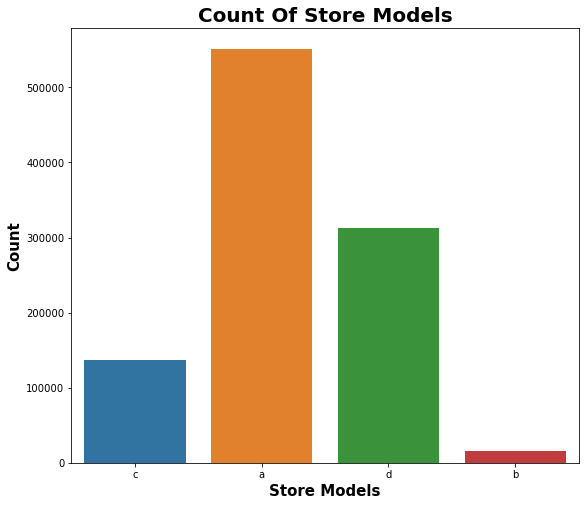

In [ ]:
# Plotting a subplot bar graph for Store Models
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.countplot(df['StoreType'])
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Count Of Store Models",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Bar chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here we can infer that 'a' Store Model have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight shows business has 'a' Store Model have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts

#### Chart - 2

Text(0.5, 0, 'Store Models')

<Figure size 1440x360 with 0 Axes>

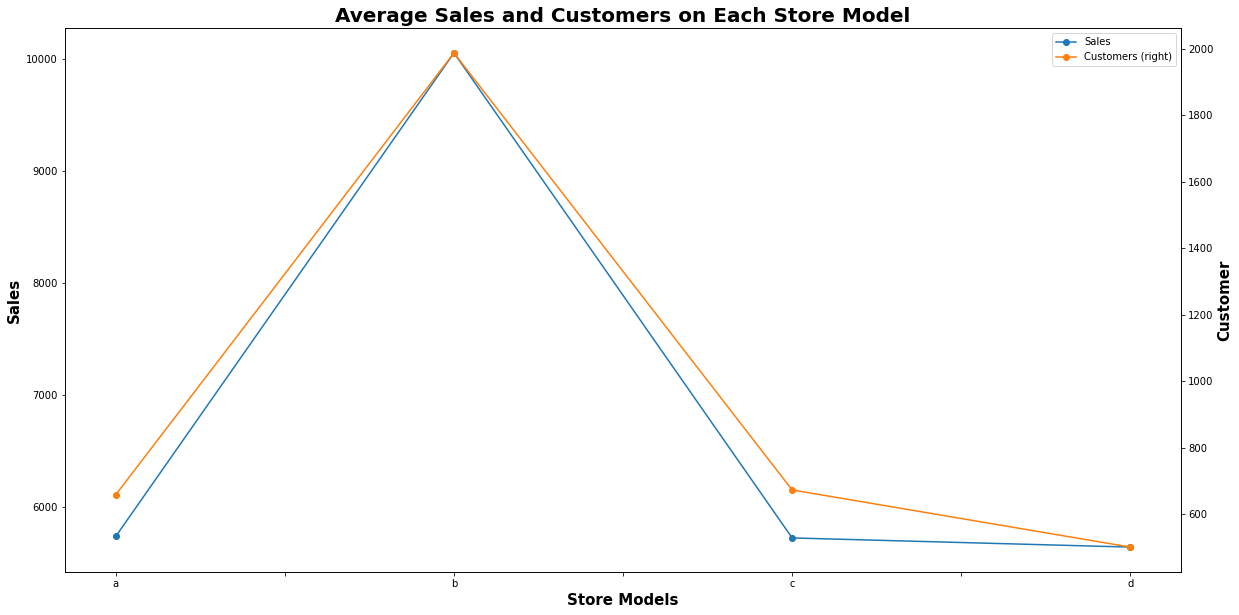

In [ ]:
# Plotting Average sales and customers on each store model using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('StoreType')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Store Model',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Line chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here it is surprising to see that store model "b" which had least number of store counts performs quite well on average sales and customers compared to other store models.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight shows business need to open more store moddel b types for increasing the profitability

#### Chart - 3

Text(0.5, 1.0, 'Count Of Assortment Levels')

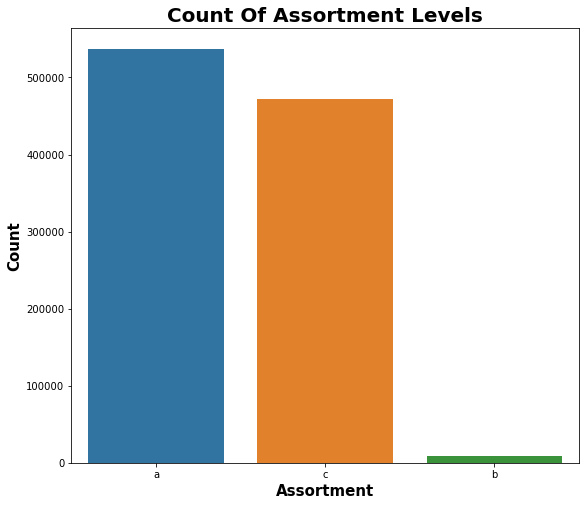

In [ ]:
#  Plotting a subplot bar graph for Assortment
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_title("Count Of Assortment Levels",fontsize=20,fontdict={"weight": "bold"}, color='black')

##### 1. Why did you pick the specific chart?

Bar chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

a = Basic, b = Extra, c = Extended

Here we can see that Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight shows business need to open more basic assortment level followed by Extended level while Extra Assortment  for increasing the profitability

#### Chart - 4

Text(0.5, 0, 'Assortment Levels')

<Figure size 1440x360 with 0 Axes>

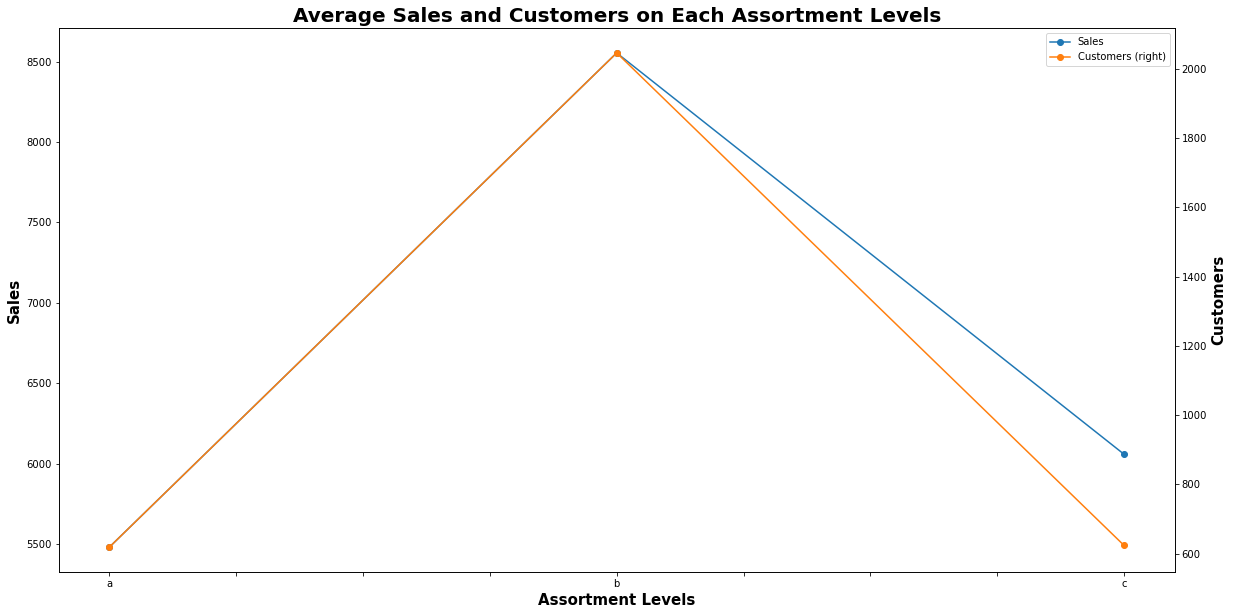

In [ ]:
# Plotting Average sales and customers on each assortment level using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Assortment')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customers',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Assortment Levels',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Assortment Levels',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Line chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here again it is surprising to see that Assortment level "b" which had least store counts have perform quite well compared to "a". While there is an another surprising fact that assortment level "c" have maximum number of sales with the least number of customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 Insight shows business need to open more Assortment level "b" compared to "a"  followed by  assortment level "c"  for increasing the profitability

#### Chart - 5

Text(0.5, 1.0, 'Sales in Different Stores And Assortment ')

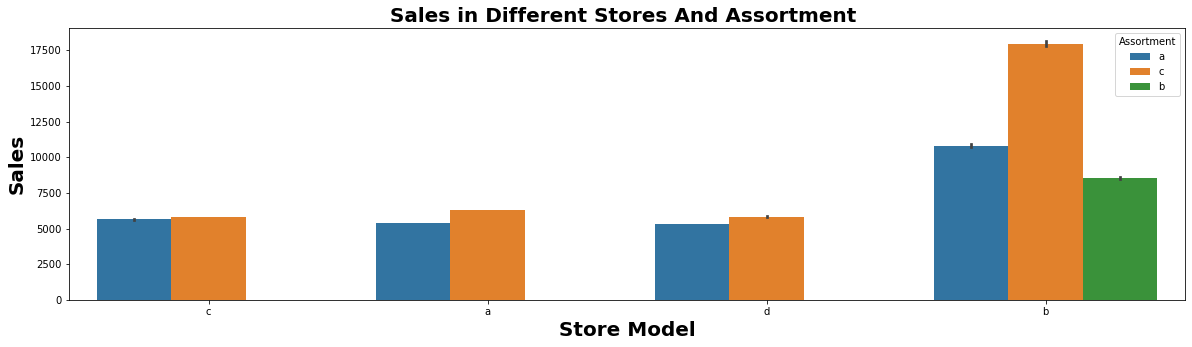

In [ ]:
#Let's check the relationship between store type, assortment levels and sales
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])
ax.set_xlabel('Store Model',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Sales in Different Stores And Assortment ",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Line chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here we can see that Store Model "b" has the maximum number of sales at all assortment level and Assortment Level "b" is only available in Store Level "b".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insight shows business need to open more Store Model "b"  for increasing the profitability

#### Chart - 6

Text(0.5, 1.0, 'Impact of Promo on Sales and Customers')

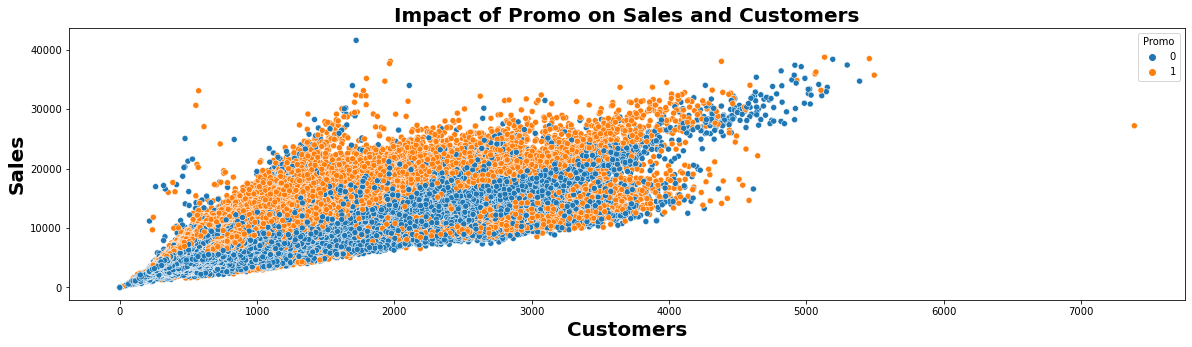

In [ ]:
# Plotting Effect of Promo on Sales and Customers using scatterplot
plt.figure(figsize=(20,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Impact of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

We used scatter plot as sales and customers pair well together and  plotting them on a scatter diagram is a great way to view their relationship and see if it's a positive or negative correlation

##### 2. What is/are the insight(s) found from the chart?

Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticiable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a need to increase promo to attract more customers

#### Chart - 7

Text(0.5, 1.0, 'Sales and Promo During The week ')

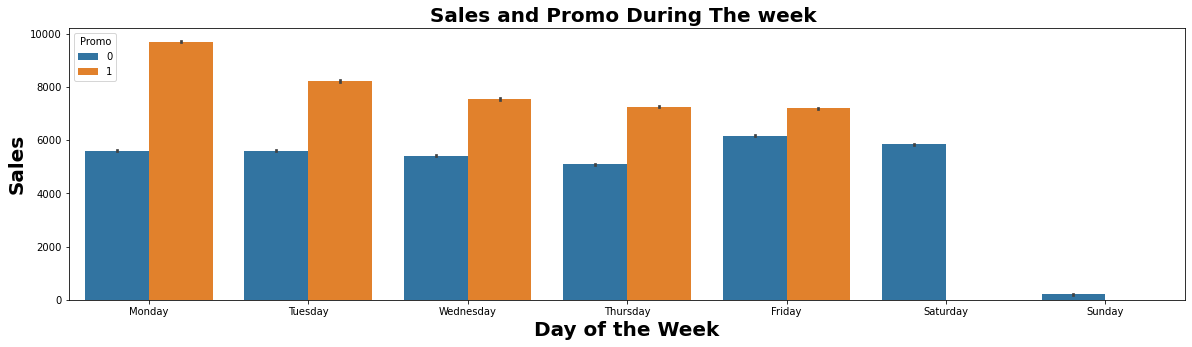

In [ ]:
#Let's check the Sales and Promo During The week
plt.figure(figsize=(20,5))
ax = sns.barplot(x=df["DayOfWeek"],y=df['Sales'],hue=df["Promo"])
ax.set_xlabel('Day of the Week',size=20,fontdict={"weight": "bold"})
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Sales and Promo During The week ",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Bar chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here we can infer that promo had been provided to the customers throughout the weekdays reason why sales were also high but sales on weekends were very low as promo weren't provided to the customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promo had been provided to the customers throughout the weekdays reason why sales were also high but sales on weekends were very low as promo weren't provided to the customers

#### Chart - 8

Text(0.5, 0, 'Date')

<Figure size 1440x360 with 0 Axes>

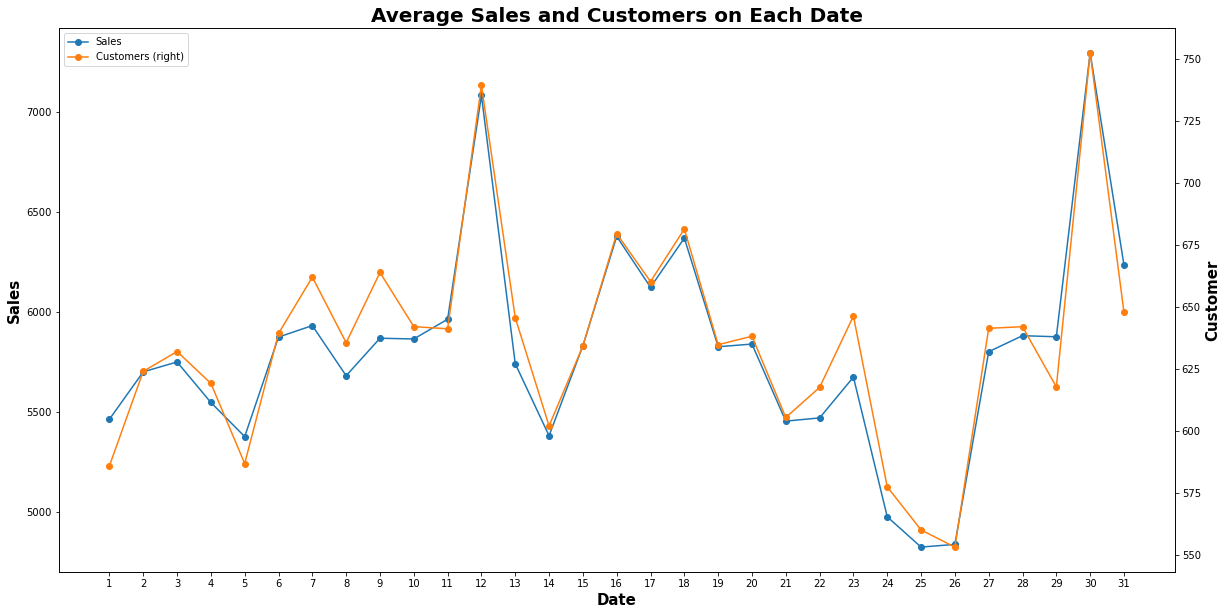

In [ ]:
# Plotting Average sales and number of customers per Day using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Average Sales and Customers on Each Date',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Date',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Line chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here we can infer from the graph that the sales is highest on 30th followed by 2nd and 4th date of every month while sales is lowest on the 1st date of every month followed by 25th and 26th date

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Inventory management should be highest at on 30th followed by 2nd and 4th date of every month 

#### Chart - 9

Text(0.5, 0, 'Day Of Week')

<Figure size 1440x360 with 0 Axes>

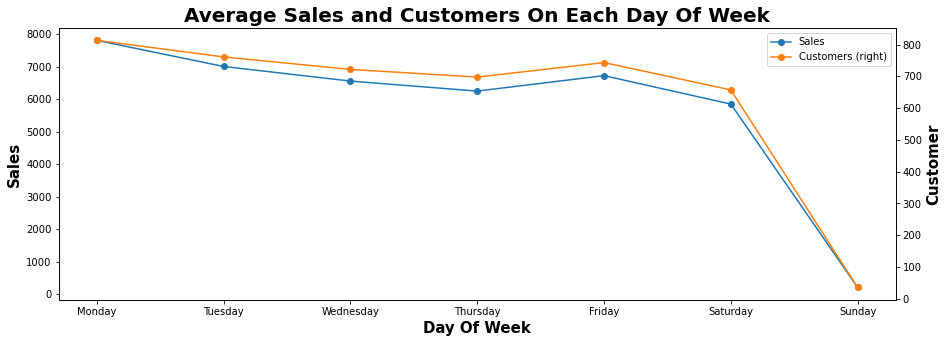

In [ ]:
# Plotting Average sales and number of customers per DayOfWeek using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,8),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Sales and Customers On Each Day Of Week',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Day Of Week',size=15,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Line chart works very well while comparing a categorical variable with a numeric variable

##### 2. What is/are the insight(s) found from the chart?

Here we can infer from the graph that the sales are at maximum on Mondays while sales are zero on Sunday because it seems like store use to remain closed on Sundays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Inventory management should be highest on Sunday

#### Chart - 10

Text(0.5, 1.0, 'Effect Of Competition Distance on Sales ')

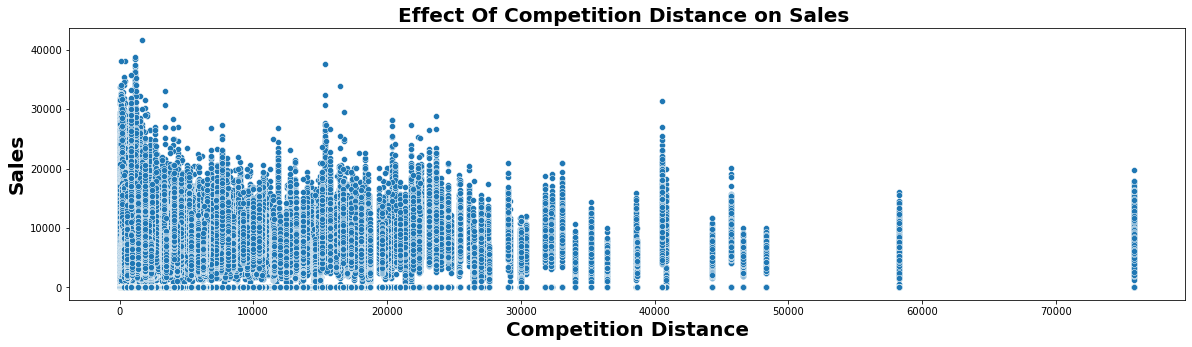

In [ ]:
#scatterplot of Competition Distance and Sales
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
ax.set_xlabel('Competition Distance',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Effect Of Competition Distance on Sales ",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

We used scatter plot as sales and customers pair well together and plotting them on a scatter diagram is a great way to view their relationship and see if it's a positive or negative correlation

##### 2. What is/are the insight(s) found from the chart?

Here we can observe that the mostly competitor stores weren't that far and the stores were densely located near each other. Sales were higher when competition was nearer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Management needs to focus more on stores that are next to large number of competitors stores

#### Chart - 11

Text(0.5, 1.0, 'Sales During State Holidays')

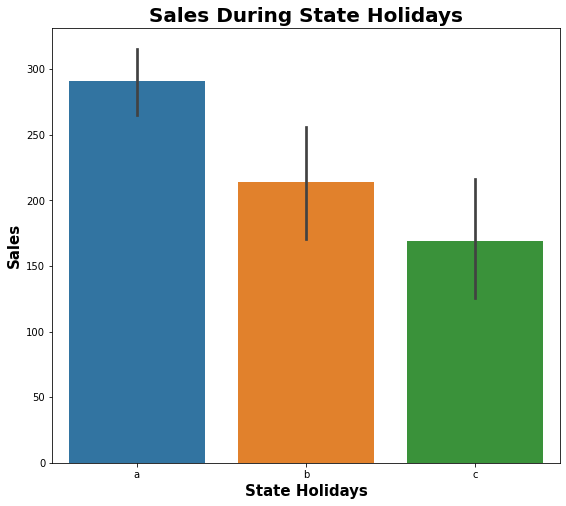

In [ ]:
# countplot for sateholiday sales
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax = sns.barplot(data=df[(df.StateHoliday != 0) & (df.StateHoliday!= '0')],x='StateHoliday',y='Sales')
ax.set_xlabel('State Holidays',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Sales During State Holidays",fontsize=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Countplot removes the hassle of counting and plotting as it does both things in a single line of code

##### 2. What is/are the insight(s) found from the chart?

a = Public holiday, b = Easter holiday, c = Christmas holiday

Here we can see that during Public holidays store made more sales compared to Easter and Christmas holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Large number of inventory is required on State Holiays

#### Chart - 12

Text(0.5, 1.0, 'Impact of School Holidays on Sales')

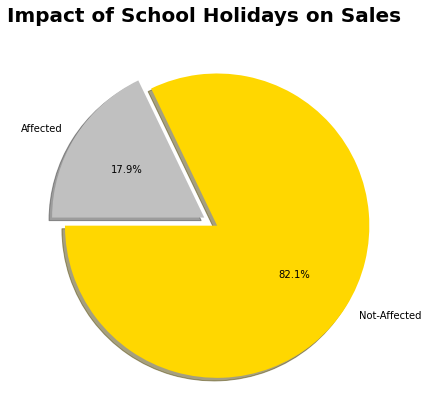

In [ ]:
# Pie chart for schoolholiday
plt.figure(figsize=(15,8))
plt.subplot(121)
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Impact of School Holidays on Sales",size=20,fontdict={"weight": "bold"})

##### 1. Why did you pick the specific chart?

Pie chart removes the hassle of calculating the percentage and calculates

both percentage and also provide beautiful visualization

##### 2. What is/are the insight(s) found from the chart?

Here we can see that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Managers should also take children into account while deciding promos

#### Chart - 14 - Correlation Heatmap

<AxesSubplot:>

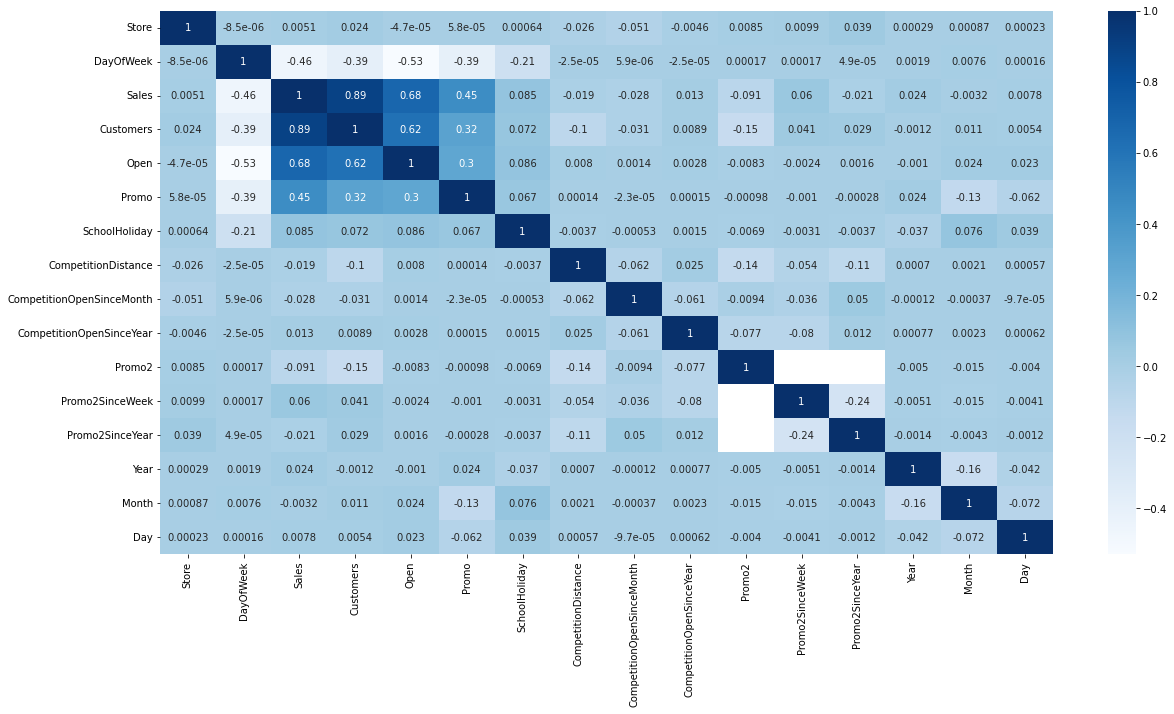

In [ ]:
# Correlation Heatmap visualization code
# Plotting correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

##### 1. Why did you pick the specific chart?

This chart is helpful for checking the correlation between the variables

##### 2. What is/are the insight(s) found from the chart?

It is clear that Sales,customers,open and promos columns are heavily correlated. We will try to feature engineer in further down the line

### 1. Feature Manipulation & Selection



---


**PromoOpen**

---



#### 1. Feature Manipulation

In [ ]:
# Creating New Column From Existing Columns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

**Here we have created new column called "PromoOpen" from existing columns to measure more accurate period(in Months) from when the store was participating in the Promo2.**

In [ ]:
#Lets Check Our Columns
df[['Promo','Promo2','PromoInterval','Promo2SinceYear', 'Promo2SinceWeek', 'PromoOpen']].sample(10)

,Promo,Promo2,PromoInterval,Promo2SinceYear,Promo2SinceWeek,PromoOpen
296996,1,0,NaN,<NA>,<NA>,<NA>
846135,0,0,NaN,<NA>,<NA>,<NA>
764681,1,0,NaN,<NA>,<NA>,<NA>
99875,0,0,NaN,<NA>,<NA>,<NA>
940727,0,1,"Jan,Apr,Jul,Oct",2012,40,25.0
691082,0,1,"Feb,May,Aug,Nov",2013,31,2.25
701979,0,0,NaN,<NA>,<NA>,<NA>
567925,0,1,"Jan,Apr,Jul,Oct",2010,13,44.75
134274,0,0,NaN,<NA>,<NA>,<NA>
66302,0,0,NaN,<NA>,<NA>,<NA>


In [ ]:
# Checking PromoOpen Negative figures 
df[df["PromoOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen
17926,20,1,9229,954,1,1,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,30,-4.0
17927,20,7,0,0,0,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,29,-4.0
17928,20,6,5572,566,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,28,-4.0
17929,20,5,7149,839,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,27,-4.0
17930,20,4,8118,997,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,26,-4.0
17931,20,3,7212,911,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,25,-4.0
17932,20,2,7104,854,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,24,-4.0
17933,20,1,7856,946,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,23,-4.0
17934,20,7,0,0,0,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,22,-4.0
17935,20,6,4862,499,1,0,0,0,d,a,...,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2014,6,21,-4.0


In [ ]:
# Replacing Those Negative Figures With Zero 
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

**Here PromoOpen column has figures in negative which indicates that the store have not started any promo yet. So we have replace those negative figures with zero**.



---


**CompetitionOpen**

---



In [ ]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

**Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened.**

In [ ]:
#Lets Check Our Columns
df[['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
292143,17500.0,2001,4,163
381052,1060.0,2009,5,62
433833,140.0,2005,9,88
803890,30.0,2013,4,11
892910,4420.0,2005,9,114
931012,1080.0,2011,5,27
930175,40.0,2015,8,-28
442880,3270.0,<NA>,<NA>,<NA>
80230,10690.0,2005,10,87
160476,1250.0,2004,2,108


In [ ]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
3796,5,5,4475,527,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,7,<NA>,-1
3797,5,4,6035,613,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,2,7,<NA>,-2
3798,5,3,6253,717,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,1,7,<NA>,-3
3826,5,3,5703,674,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,6,<NA>,-1
3827,5,2,6416,686,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,2,6,<NA>,-2
3828,5,1,8396,778,1,1,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,1,6,<NA>,-3
3857,5,7,0,0,0,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,5,<NA>,-1
3858,5,6,3182,327,1,0,0,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,2,5,<NA>,-2
3859,5,5,0,0,0,1,a,0,a,a,...,2015,0,<NA>,<NA>,NaN,2015,1,5,<NA>,-3
3887,5,5,0,0,0,1,b,1,a,a,...,2015,0,<NA>,<NA>,NaN,2015,3,4,<NA>,-1


In [ ]:
# Replacing Those Negative Figures With Zero
df.loc[df["CompetitionOpen"]<0, "CompetitionOpen" ] = 0

**Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero**.

#### 2. Feature Selection

In [ ]:
# Finally Dropping Irrelevant COlumns
df = df.drop(["Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth"], axis=1) 

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Year', 'Month',
       'Day', 'PromoOpen', 'CompetitionOpen'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We used business knowledge to select the features

##### Which all features you found important and why?

'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Year', 'Month',
       'Day', 'PromoOpen', 'CompetitionOpen' 
       
       were important as it best described our data

### 2. Handling Missing Values

In [ ]:
#Checking the number of Null Values in our columns.
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

CompetitionDistance column has 2642 null values.

PromoInterval column has 508031 null values.

PromoOpen column has 508031 null values.

CompetitionOpen column has 323348 null values.



In [ ]:
# Checking the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
print(missing_value)

                      Total  Percentage
PromoOpen            508031   49.943620
PromoInterval        508031   49.943620
CompetitionOpen      323348   31.787764
CompetitionDistance    2642    0.259730
DayOfWeek                 0    0.000000
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
Promo2                    0    0.000000
Store                     0    0.000000
StoreType                 0    0.000000
SchoolHoliday             0    0.000000
StateHoliday              0    0.000000
Promo                     0    0.000000
Open                      0    0.000000
Customers                 0    0.000000
Sales                     0    0.000000
Assortment                0    0.000000


In [ ]:
# Checking dataset when Promo2 is zero
df[df["Promo2"]==0].sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
269536,297,2,5378,705,1,0,0,1,a,a,2300.0,0,NaN,2013,10,29,<NA>,37
611463,672,7,0,0,0,0,0,0,c,a,240.0,0,NaN,2015,8,2,<NA>,155
762499,837,2,4667,529,1,0,0,0,a,c,14600.0,0,NaN,2014,1,14,<NA>,0
711277,781,5,4892,754,1,1,0,1,a,a,630.0,0,NaN,2013,5,17,<NA>,73
540428,593,6,11909,1349,1,0,0,0,a,c,33060.0,0,NaN,2014,11,29,<NA>,56
847174,930,3,0,0,0,0,a,1,a,a,70.0,0,NaN,2014,1,1,<NA>,<NA>
722130,793,1,4158,437,1,0,0,1,d,a,2710.0,0,NaN,2014,11,8,<NA>,100
727613,799,7,0,0,0,0,0,0,a,c,2700.0,0,NaN,2014,7,27,<NA>,<NA>
388081,426,2,6859,713,1,1,0,0,a,a,250.0,0,NaN,2015,2,6,<NA>,<NA>
133030,147,1,0,0,0,0,b,1,d,c,8540.0,0,NaN,2014,4,21,<NA>,<NA>


**We can see that whenever the store was not participating in Promo2, we had null values present in PromoOpen and PromoInterval columns as well.**

In [ ]:
# Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.PromoOpen = df['PromoOpen'].transform(impute_zero)
df.PromoInterval = df['PromoInterval'].transform(impute_zero)

**Here we have imputed zero in place of null values present in PromoOpen and PromoInterval columns because logically when promo2 is zero then PromoOpen and PromoInterval should be zero too.**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

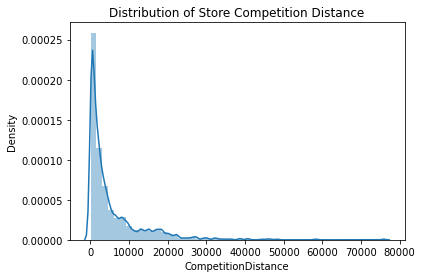

In [ ]:
# let's first have a look at its distribution of CompetitionDistance

sns.distplot(df.CompetitionDistance)
plt.title("Distribution of Store Competition Distance")

In [ ]:
# Filling null values using median as CompetitionDistance column is skewed towards right
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True) 

In [ ]:
# Filling null values using mode as CompetitionOpen column is made by combining the two categorical columns
df['CompetitionOpen'].fillna(df['CompetitionOpen'].mode()[0], inplace = True)

In [ ]:
#Better To Double Check
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
PromoInterval          0
Year                   0
Month                  0
Day                    0
PromoOpen              0
CompetitionOpen        0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We used value imputation for null value treatment

### 2. Handling Outliers

In [ ]:
# Printing the number of rows and columns before outlier treatment
print('\033[1mBefore Outlier Treatment\033[0m')
print('Number of rows: {}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

Before Outlier Treatment
Number of rows: 1017209
Number of columns:18


In [ ]:
# let's look at the statistical aspects of the dataframes for determining outliners.
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,PromoOpen,CompetitionOpen
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0,1017209.0
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,5.005638e-01,2.013832e+03,6.115173e+00,1.543438e+01,13.224908,42.21913
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.999999e-01,7.773960e-01,3.390429e+00,9.051924e+00,19.166908,65.439678
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.0,0.0
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,7.000000e+00,0.0,0.0
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,0.0,17.0
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,9.000000e+00,2.300000e+01,25.5,73.0
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,76.25,1391.0


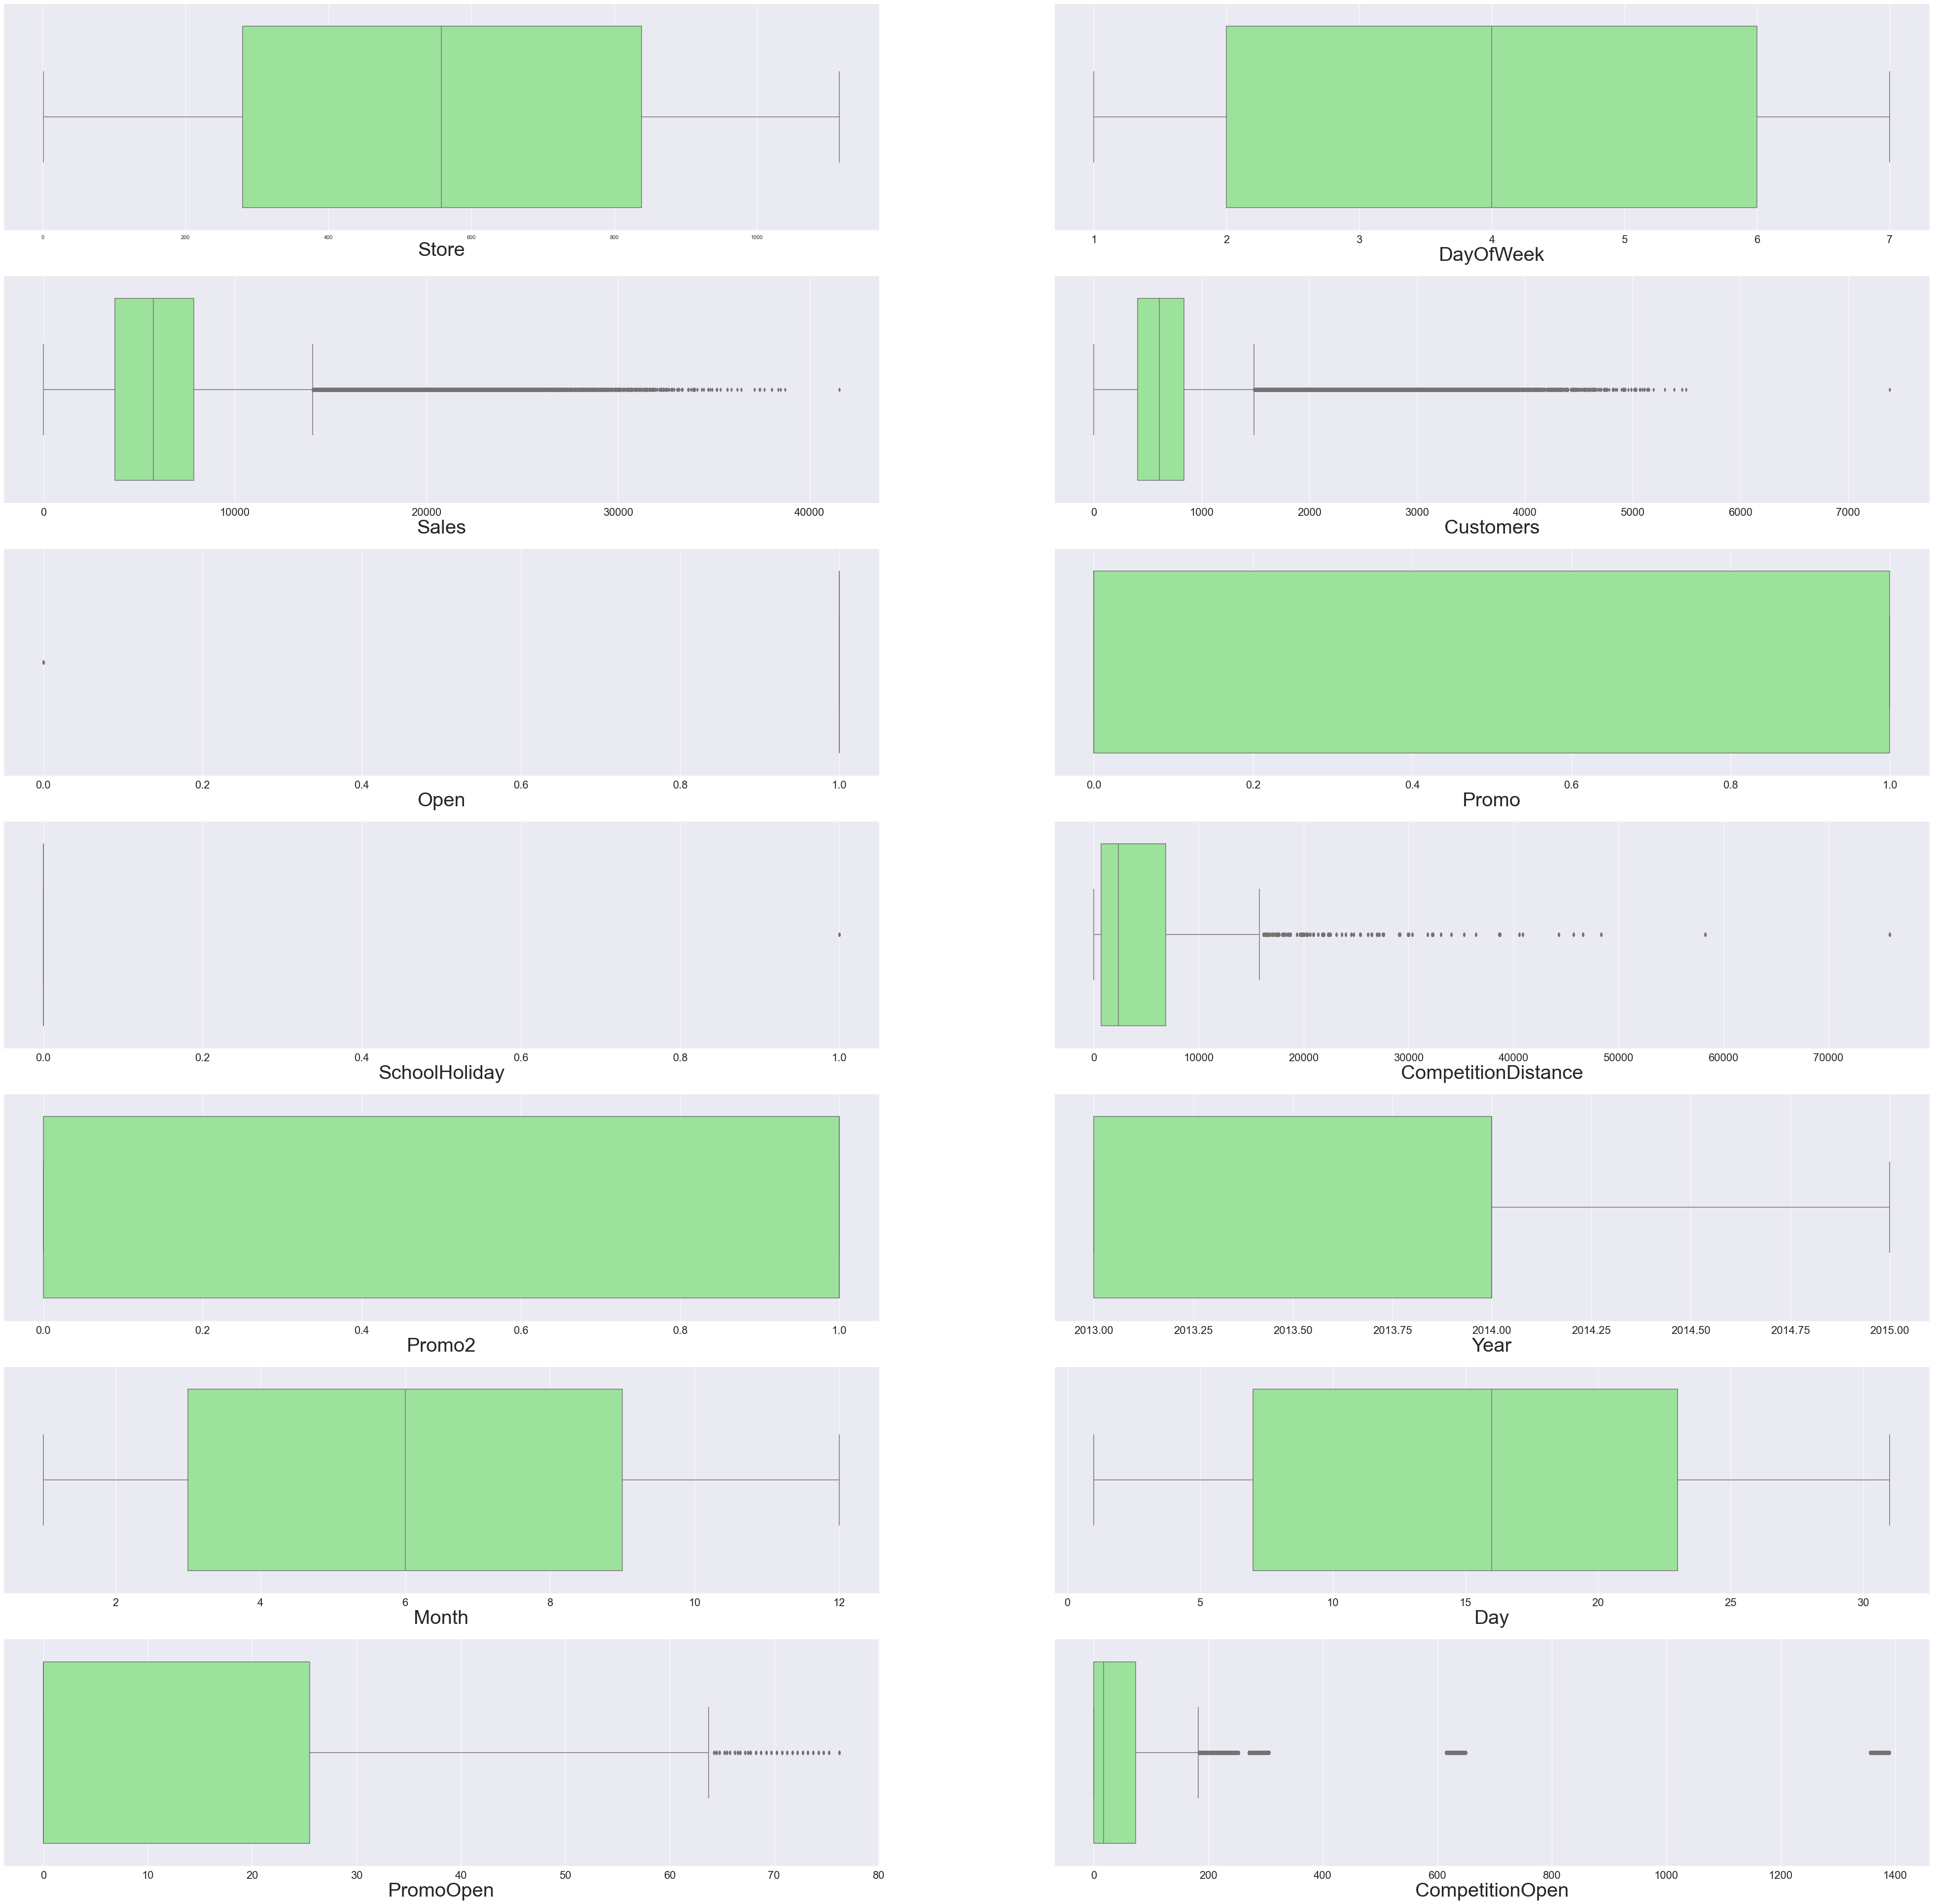

In [ ]:
# Box plot to detect outliers
lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)

In [ ]:
# Removing outliers using z score method on sales column.
df['z_sale'] = np.abs(stats.zscore(df['Sales']))
df = df[(df['z_sale'] < 3)]
df.drop(['z_sale'],axis=1,inplace=True)

In [ ]:
# Removing outliers using z score method on customers column.
df['z_customer'] = np.abs(stats.zscore(df['Customers']))
df = df[(df['z_customer'] < 3)]
df.drop(['z_customer'],axis=1,inplace=True)

In [ ]:
# Printing the number of rows and columns before outlier treatment
print('\033[1mAfter Outlier Treatment\033[0m')
print('Number of rows: {}\nNumber of columns:{}'.format(df.shape[0],df.shape[1]))

After Outlier Treatment
Number of rows: 996977
Number of columns:18


**Here 'Sales' and 'Customers' are very important columns so outliers in these columns may affect our prediction tremendously therefore we have removed them using z score method and we tried to remove least number of rows required, by only removing those rows which does not follow the trend pattern.**

In [ ]:
#Capping the outlier rows with Percentiles

upper_lim = df['CompetitionDistance'].quantile(.95)
lower_lim = df['CompetitionDistance'].quantile(.05)
df.loc[(df["CompetitionDistance"] > upper_lim),"CompetitionDistance"] = upper_lim
df.loc[(df["CompetitionDistance"] < lower_lim),"CompetitionDistance"] = lower_lim

upper_lim = df['CompetitionOpen'].quantile(.95)
lower_lim = df['CompetitionOpen'].quantile(.05)
df.loc[(df["CompetitionOpen"] > upper_lim),"CompetitionOpen"] = upper_lim
df.loc[(df["CompetitionOpen"] < lower_lim),"CompetitionOpen"] = lower_lim

upper_lim = df['PromoOpen'].quantile(.95)
lower_lim = df['PromoOpen'].quantile(.05)
df.loc[(df["PromoOpen"] > upper_lim),"PromoOpen"] = upper_lim
df.loc[(df["PromoOpen"] < lower_lim),"PromoOpen"] = lower_lim

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have replaced outliers with different percentile values using capping method as the number of outliers were huge.

We also eliminated the outliers using zscore transform for dependent variable and also for most important feature of dataset to minimize the sata loss

### 3. Categorical Encoding

In [ ]:
# Converting catagorical variables into dummy integers
df = pd.get_dummies(columns = ['StateHoliday','StoreType','Assortment','PromoInterval',], data = df, drop_first = True)

In [ ]:
# Checking results of previous execution
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,1270.0,0,2015,...,0,0,0,1,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,1270.0,0,2015,...,0,0,0,1,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,1270.0,0,2015,...,0,0,0,1,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,1270.0,0,2015,...,0,0,0,1,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,1270.0,0,2015,...,0,0,0,1,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used get dummies method of pandas dataframe as it provided best solution for our problem

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### **Dependant Variable Transformation**

<AxesSubplot:xlabel='Sales', ylabel='Density'>

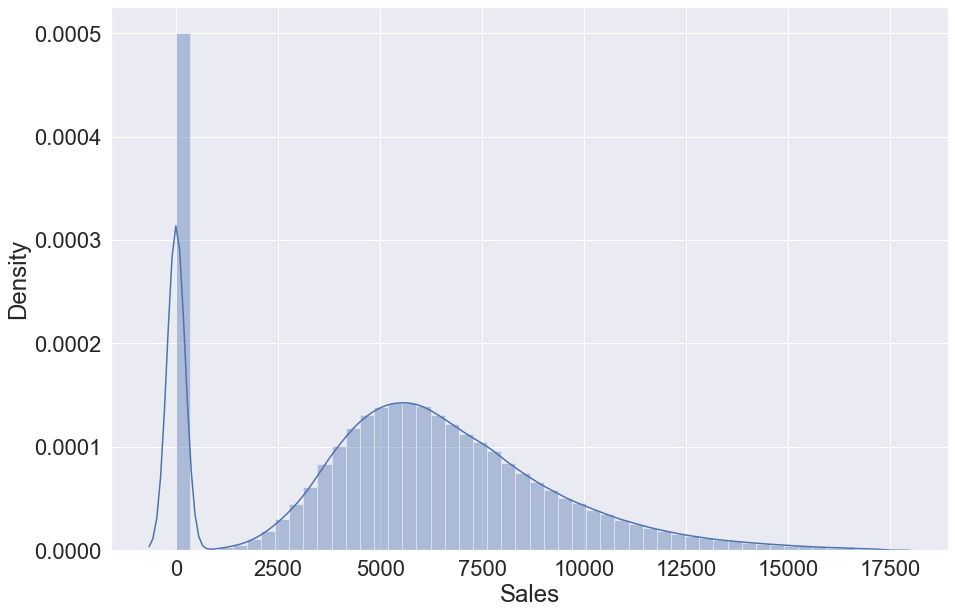

In [ ]:
# Checking our sales column distribution
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

In [ ]:
# square root transformation of sales column
df['Sales'] = np.sqrt(df['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

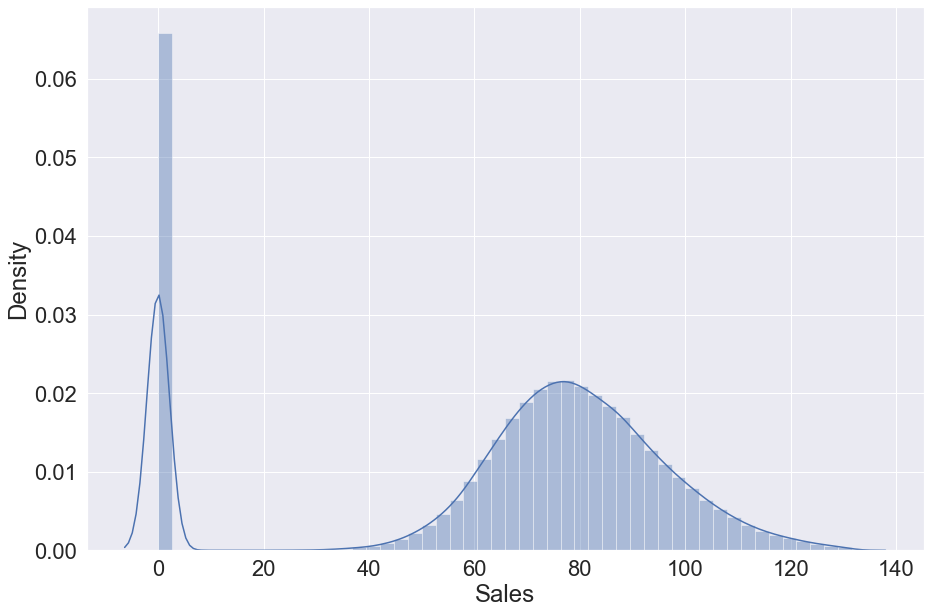

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

**We have noticed that our sales column was right skewed so here we have used square root transformation to remove the skewness.**

### 6. Data Scaling

In [ ]:
# Scaling and Fitting Our Numerical Columns
numerical_cols = ['Customers','CompetitionDistance','Year','Month','DayOfWeek','Day','CompetitionOpen','PromoOpen']
scaler = MinMaxScaler()
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])

##### Which method have you used to scale you data and why?
We used StandardScaler for scaling as this estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

### 8. Data Splitting

In [ ]:
# x is Independent variable
x = df.loc[:,df.columns!='Sales'] 

# y is Dependent variable
y = df['Sales']

In [ ]:
# Spitting our data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the shape of the train-test dataset
print(x_train.shape,x_test.shape)

(797581, 24) (199396, 24)


##### What data splitting ratio have you used and why? 

We have used a lower ratio as our dataset was already small after all processing

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Class imbalancce is not needed as it is linear regression problem

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression model

In [ ]:
# Training Linear Regression Model
reg = LinearRegression()

# Fit the Algorithm
reg.fit(x_train,y_train)

# Predict on the model
y_pred = reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

In [ ]:
print('\033[1mLinear Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, y_pred),6)}\nMSE :{ round(mean_squared_error(y_test, y_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, y_pred),6)),6)}\nR2 :{round(r2_score(y_test, y_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Linear Regression Model Metrics:
MAE :5.084573
MSE :42.210907
RMSE :6.496992
R2 :0.962812
Adjusted R2 :0.962808


#### 2. Cross- Validation & Hyperparameter Tuning

Since Linear Regression is the simplest machine learning model it does not have any parameter to tune. Hence we did not perform any hyperparameter tuning

### ML Model - 2 Lasso Regression Model

In [ ]:
# Training Support Vector Classifier Model
lass = Lasso(max_iter = 2000,random_state=42)
lass.fit(x_train,y_train)

# Model Prediction
prediction_lasso = lass.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Lasso regression is a regularization technique.The word “LASSO” stands for Least Absolute Shrinkage and Selection Operator. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

Lasso Regression uses L1 regularization technique. It is used when we have more features because it automatically performs feature selection.

In [ ]:
# Model Metrics
print('\033[1mLasso Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, prediction_lasso),6)}\nMSE :{ round(mean_squared_error(y_test, prediction_lasso),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, prediction_lasso),6)),6)}\nR2 :{round(r2_score(y_test, prediction_lasso),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, prediction_lasso)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Lasso Regression Model Metrics:
MAE :7.382801
MSE :86.703601
RMSE :9.311477
R2 :0.923614
Adjusted R2 :0.923605


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'alpha':[i*0.25 for i in range(21)]}

# Defining object for GridSearchCV
lass_GCV=Lasso(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
lass_GCV=GridSearchCV(lass_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
lass_GCV.fit(x_train,y_train)

# Predict on the model
lass_pred=lass_GCV.predict(x_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Lasso Regression according to GCV:\033[0m',lass_GCV.best_params_)
print('\033[1mTuned Lasso Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, lass_pred),6)}\nMSE :{ round(mean_squared_error(y_test, lass_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, lass_pred),6)),6)}\nR2 :{round(r2_score(y_test, lass_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, lass_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for Lasso Regression according to GCV: {'alpha': 0.0}
Tuned Lasso Regression Model Metrics:
MAE :5.084573
MSE :42.210907
RMSE :6.496992
R2 :0.962812
Adjusted R2 :0.962808


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**MAE**        : Reduction by 2.298228

**MSE**        : Reduction by 44.492694

**RMSE**       : Reduction by 2.814485

**R2**         : Increase by 0.039198

**Adjusted R2**: Increase by 0.039203

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**MAE**        : Mean Absolute Error calculates the average difference between the calculated values and actual values.

**MSE**        : MSE, you take the difference between your model's predictions and the ground truth, square it, and average it out across the whole dataset.

**RMSE**       : It is the square root of MSE

**R2**         : (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Adjusted R2**: Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

### ML Model - Ridge Regression

In [ ]:
# Training Decision Tree Classifier Model
ridge = Ridge(random_state=42)

# Fit the Algorithm
ridge.fit(x_train, y_train)

# Predict on the model
pred_ridge =ridge.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [ ]:
# Model Metrics
print('\033[1mRidge Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, pred_ridge),6)}\nMSE :{ round(mean_squared_error(y_test, pred_ridge),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, pred_ridge),6)),6)}\nR2 :{round(r2_score(y_test, pred_ridge),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, pred_ridge)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Ridge Regression Model Metrics:
MAE :5.084561
MSE :42.210882
RMSE :6.49699
R2 :0.962812
Adjusted R2 :0.962808


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'alpha':[i*0.25 for i in range(21)]}

# Defining object for GridSearchCV
rid_GCV=Ridge(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
rid_GCV=GridSearchCV(rid_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fit the Algorithm
rid_GCV.fit(x_train,y_train)

# Predict on the model
rid_pred=rid_GCV.predict(x_test)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Ridge Regression according to GCV:\033[0m',rid_GCV.best_params_)
print('\033[1mTuned Ridge Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, rid_pred),6)}\nMSE :{ round(mean_squared_error(y_test, rid_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, rid_pred),6)),6)}\nR2 :{round(r2_score(y_test, rid_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, rid_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for Ridge Regression according to GCV: {'alpha': 0.0}
Tuned Ridge Regression Model Metrics:
MAE :5.084573
MSE :42.210907
RMSE :6.496992
R2 :0.962812
Adjusted R2 :0.962808


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement was observed

### ML Model - 4 Decision Tree Regression Model

In [ ]:
# ML Model - 4 Implementation
# Training Random Forest Classifier Model
des_regressor = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
des_regressor.fit(x_train,y_train)

# Predict on the model
y_pred_des = des_regressor.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

* Conditions [Decision Nodes]
* Result [End Nodes]

In [ ]:
# Model Metrics
print('\033[1mDecision Tree Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, y_pred_des),6)}\nMSE :{ round(mean_squared_error(y_test, y_pred_des),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, y_pred_des),6)),6)}\nR2 :{round(r2_score(y_test, y_pred_des),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, y_pred_des)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Decision Tree Regression Model Metrics:
MAE :2.256128
MSE :11.525296
RMSE :3.394893
R2 :0.989846
Adjusted R2 :0.989845


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Initializing paramter grid for GridSearchCV
params_grid={'min_samples_leaf':range(1,10),
            'max_depth':[None,5,10,20,40,80,160,320]}

# Defining object for GridSearchCV
dtr_GCV=DecisionTreeRegressor(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
dtr_GCV=GridSearchCV(dtr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
dtr_GCV.fit(x_train,y_train)

# Predicting Using GridSearchCV
dtr_pred=dtr_GCV.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Decision Tree Regression according to GCV:\033[0m',dtr_GCV.best_params_)
print('\033[1mTuned Decision Tree Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, dtr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, dtr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, dtr_pred),6)),6)}\nR2 :{round(r2_score(y_test, dtr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, dtr_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for Decision Tree Regression according to GCV: {'max_depth': None, 'min_samples_leaf': 7}
Tuned Decision Tree Regression Model Metrics:
MAE :1.994349
MSE :9.255943
RMSE :3.042358
R2 :0.991845
Adjusted R2 :0.991845


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**MAE**        : Reduction by 0.261779

**MSE**        : Reduction by 2.269353

**RMSE**       : Reduction by 0.352535

**R2**         : Increase by 0.001999

**Adjusted R2**: Increase by 0.002

### ML Model - 5 Random Forest Regression

In [ ]:
# ML Model - 5 Random Forest Regression Implementation
random_forest=RandomForestRegressor(random_state=42)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
v_pred_rf=random_forest.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
# Model Metrics
print('\033[1mRandom Forest Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, v_pred_rf),6)}\nMSE :{ round(mean_squared_error(y_test, v_pred_rf),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, v_pred_rf),6)),6)}\nR2 :{round(r2_score(y_test, v_pred_rf),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, v_pred_rf)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Random Forest Regression Model Metrics:
MAE :1.601525
MSE :5.674331
RMSE :2.382085
R2 :0.995001
Adjusted R2 :0.995


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Initializing paramter grid for GridSearchCV
params_grid={'min_samples_split':range(2,6),
            'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
rfr_GCV=RandomForestRegressor(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
rfr_GCV=GridSearchCV(rfr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fit the Algorithm
rfr_GCV.fit(x_train,y_train)

# Predict on the model
rfr_pred=rfr_GCV.predict(x_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Random Forest Regression according to GCV:\033[0m',rfr_GCV.best_params_)
print('\033[1mTuned Random Forest Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, rfr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, rfr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, rfr_pred),6)),6)}\nR2 :{round(r2_score(y_test, rfr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, rfr_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for Random Forest Regression according to GCV: {'min_samples_leaf': 1, 'min_samples_split': 4}
Tuned Random Forest Regression Model Metrics:
MAE :1.600358
MSE :5.670707
RMSE :2.381325
R2 :0.995004
Adjusted R2 :0.995003


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**MAE**        : Increase by 0.001167

**MSE**        : Reduction by 0.003624

**RMSE**       : Reduction by 0.00076

**R2**         : Increase by 0.000003

**Adjusted R2**: Increase by 0.000003

### ML Model - 6 Gradient Boosting Regression

In [ ]:
# Training Gradient Boosting Regression Model
gbc_reg = GradientBoostingRegressor(random_state =42)

# Fit the Algorithm
gbc_reg.fit(x_train,y_train)

# Predict on the model
y_pred_gb =gbc_reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function.

In [ ]:
# Model Metrics
print('\033[1mGradient Boosting Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, y_pred_gb),6)}\nMSE :{ round(mean_squared_error(y_test, y_pred_gb),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, y_pred_gb),6)),6)}\nR2 :{round(r2_score(y_test, y_pred_gb),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, y_pred_gb)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Gradient Boosting Regression Model Metrics:
MAE :3.858951
MSE :27.261817
RMSE :5.221285
R2 :0.975982
Adjusted R2 :0.975979


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'learning_rate':[i*0.1 for i in range(11)],
            'min_samples_split':range(2,6)}

# Defining object for GridSearchCV
gbr_GCV=GradientBoostingRegressor(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
gbr_GCV=GridSearchCV(gbr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
gbr_GCV.fit(x_train,y_train)

# Predicting Using GridSearchCV
gbr_pred=gbr_GCV.predict(x_test)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for Gradient Boosting Regression according to GCV:\033[0m',gbr_GCV.best_params_)
print('\033[1mTuned Gradient Boosting Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, gbr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, gbr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, gbr_pred),6)),6)}\nR2 :{round(r2_score(y_test, gbr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, gbr_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for Gradient Boosting Regression according to GCV: {'learning_rate': 0.8, 'min_samples_split': 2}
Tuned Gradient Boosting Regression Model Metrics:
MAE :2.986298
MSE :15.41175
RMSE :3.92578
R2 :0.986422
Adjusted R2 :0.986421


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**MAE**        : Reduction by 0.872653

**MSE**        : Reduction by 11.850067

**RMSE**       : Reduction by 1.295505

**R2**         : Increase by 0.01044

**Adjusted R2**: Increase by 0.010442

### ML Model - 7 XGboost Regression Model

In [ ]:
# Training Random Forest Classifier Model
xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   

# Fit the Algorithm
xgb_reg.fit(x_train,y_train)

# Predict on the model
y_pred_xgb =xgb_reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Shortly after its development and initial release, XGBoost became the go-to method and often the key component in winning solutions for a range of problems in machine learning competitions.

Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.

In [ ]:
# Model Metrics
print('\033[1mXGboost Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, y_pred_xgb),6)}\nMSE :{ round(mean_squared_error(y_test, y_pred_xgb),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, y_pred_xgb),6)),6)}\nR2 :{round(r2_score(y_test, y_pred_xgb),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, y_pred_xgb)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

XGboost Regression Model Metrics:
MAE :2.505054
MSE :11.218515
RMSE :3.349405
R2 :0.990116
Adjusted R2 :0.990115


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Initializing paramter grid for GridSearchCV
params_grid={'learning_rate':[i*0.1 for i in range(11)],
            'max_leaves':range(0,50,10)}

# Defining object for GridSearchCV
dtr_GCV=XGBRegressor()

# Using GridSearchCV that optimizes scoring parameter precision score
dtr_GCV=GridSearchCV(dtr_GCV,params_grid,n_jobs=-1,scoring='r2',verbose=10)

# Fitting data to our GridSearchCV object 
dtr_GCV.fit(x_train,y_train)

# Predicting Using GridSearchCV
dtr_pred=dtr_GCV.predict(x_test)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


In [ ]:
# Printing the metrics for GridSearchCV
print('\033[1mBest Parameters for XGboost Regression according to GCV:\033[0m',dtr_GCV.best_params_)
print('\033[1mTuned XGboost Regression Model Metrics:\033[0m')
print(f"MAE :{round(mean_absolute_error(y_test, dtr_pred),6)}\nMSE :{ round(mean_squared_error(y_test, dtr_pred),6)}\nRMSE :{round(np.sqrt(round(mean_squared_error(y_test, dtr_pred),6)),6)}\nR2 :{round(r2_score(y_test, dtr_pred),6)}\nAdjusted R2 :{round(1 - (1-r2_score(y_test, dtr_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),6)}")

Best Parameters for XGboost Regression according to GCV: {'learning_rate': 0.7000000000000001, 'max_leaves': 0}
Tuned XGboost Regression Model Metrics:
MAE :1.835941
MSE :6.086148
RMSE :2.467012
R2 :0.994638
Adjusted R2 :0.994637


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**MAE**        : Reduction by 0.669113

**MSE**        : Reduction by 5.132367

**RMSE**       : Reduction by 0.882393

**R2**         : Increase by 0.004522

**Adjusted R2**: Increase by 0.004522

# Feature Importance

In [ ]:
# Features Used In ML Model
columns = list(x_train.columns)

In [ ]:
# getting weights of all the features used in the data
feature_importance = dtr_GCV.best_estimator_.feature_importances_

# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.659591
18,StoreType_d,0.099653
19,Assortment_b,0.089237
4,Promo,0.034324
16,StoreType_b,0.026227
20,Assortment_c,0.011766
7,Promo2,0.011455
6,CompetitionDistance,0.010013
22,"PromoInterval_Jan,Apr,Jul,Oct",0.008195
17,StoreType_c,0.006239


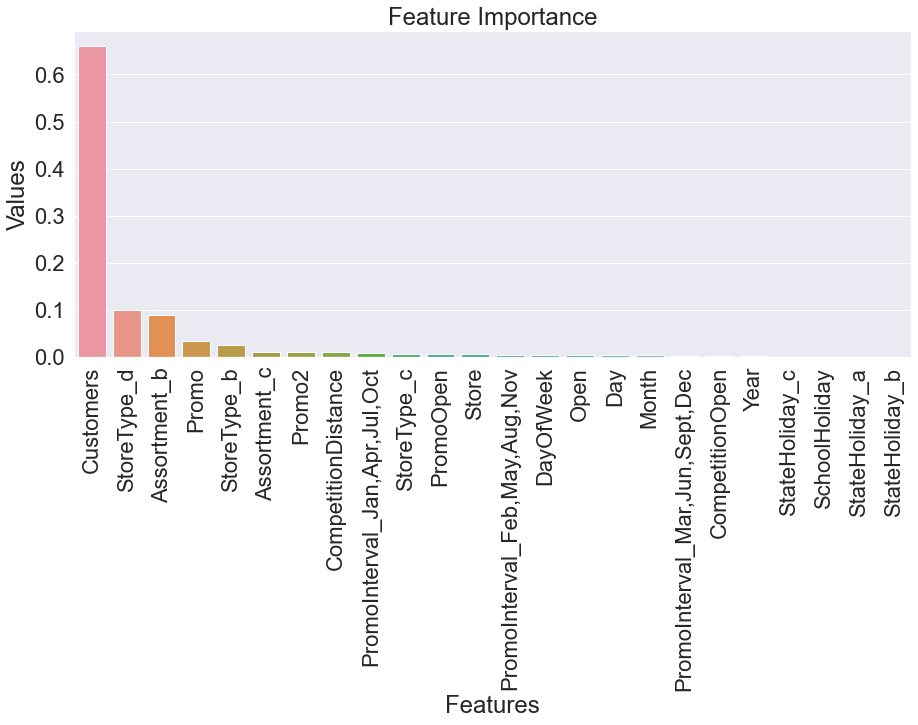

In [ ]:
# Graphical Representaion Of Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

**Here we can see the importanace of different features in our Tuned XGboost model and our model gave the heaviest feature importance to the number of customer.**

# Model Performance of our best Model

In [ ]:
from sklearn.model_selection import cross_validate,cross_val_score
cv_results=cross_validate(dtr_GCV.best_estimator_,x_train,y_train,scoring='r2',cv=3,n_jobs=-1)
print(cv_results)

{'fit_time': array([40.99968553, 43.53419709, 43.9966476 ]), 'score_time': array([0.19733977, 0.18338561, 0.12458348]), 'test_score': array([0.99467564, 0.99467391, 0.99462376])}


In [ ]:
print('\033[1mAccording to cross validate method of sklearn:\033[0m')
print('The average time for fitting the estimator on the train set is {}'.format(round((cv_results['fit_time'].sum())/len(cv_results['fit_time']),5)))
print('The average time for scoring the estimator on the test set is {}'.format(round((cv_results['score_time'].sum())/len(cv_results['score_time']),5)))
print('The average R2 score for cross validation is {}'.format(round((cv_results['test_score'].sum())/len(cv_results['test_score']),5)))

According to cross validate method of sklearn:
The average time for fitting the estimator on the train set is 42.84351
The average time for scoring the estimator on the test set is 0.16844
The average R2 score for cross validation is 0.99466


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**MAE**        : Mean Absolute Error calculates the average difference between the calculated values and actual values.

**MSE**        : MSE, you take the difference between your model's predictions and the ground truth, square it, and average it out across the whole dataset.

**RMSE**       : It is the square root of MSE

**R2**         : (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Adjusted R2**: Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost was the best performing model(Adjusted R2 :0.993358) even though it was one of the slowest from our machine learning analysis.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

Shortly after its development and initial release, XGBoost became the go-to method and often the key component in winning solutions for a range of problems in machine learning competitions.

Regression predictive modeling problems involve predicting a numerical value such as a dollar amount or a height. XGBoost can be used directly for regression predictive modeling.

From importanace of different features in our Tuned XGboost model and our model gave the heaviest feature importance to the number of customer.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


---


1. Store model 'b' have least number of stores in Rossmann yet it performed well and made more sales than other store models so it is advisable to increase the number of 'b' store model. 

2. Assortment level 'Basic' have the maximum number of stores in Rossmann yet it performed very badly but at the same time 'Extra' and 'Extended' assortment level with less number of store had preformed extra ordinarily so it would be advisable to increase these assortment level.

3. Linear relationship have been found among customer, sales and promo.And it has been seen that most of the customers came for shopping during the promo days as the cost was lower on those days. So promo should be initiated to more stores to increase the sales.

4. Sales has been low on the initial days of the month as compared to the end days, it can be assumed that people used to shop for the next month at the end of the previous month. Those products can be mainly be of basic necessities of a person's daily life.

5. Average sales on weekdays was more as compared to weekends because  promo's were provided to the customers during weekdays to increse the sales and not to weekends and reason might be that store use to remain close on Sundays.

6. Sales during November and December month was more high compared to other months and that can be due to festive season in western European countries.

7. Mostly competitor stores weren't that far and the stores were densely located near each other and also sales were higher when competition was nearer. So when competition was not there and sales were also low that might be because of the location factor like rural area.

7. School holidays also influence the sales a lot as it can be observed that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students. 

8. XGBoost was the best performing model(Adjusted R2 :0.993358) even though it was one of the slowest from our machine learning analysis.

9. According to cross validate method of sklearn our XGboost regression model had average fit_time is 36.33202, average score_time is 0.152, average R2 score is 0.99353 with 3 cross validations

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***